**Nama : Della Shanda Anggrivani**

**NIM : 24060121120024**

**Dataset : Random, Cars, Iris**

**Link : -**




**1. Lakukan agglomerative clustering untuk dataset random yang tersedia di atas
dengan single linkage dan average linkage! Jelaskan perbedaannya!**

In [225]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [226]:
# Import Librarry yang dibutuhkan

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


# Import library yang dibutuhkan untuk proses Agglomerative Clustering
import scipy
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

Generate Random Data menggunakan make_blobs

In [227]:
# Generate Random Data
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)

Code tersebut menggunakan fungsi `make_blobs` dari scikit-learn untuk membuat dataset sintetis yang terdiri dari beberapa kelompok (blobs) atau cluster. Berikut adalah penjelasan untuk setiap bagian dari kode tersebut:

1. `make_blobs`: Ini adalah fungsi dari scikit-learn yang digunakan untuk membuat dataset sintetis dengan sejumlah kelompok (blobs) atau cluster.

2. `n_samples=50`: Parameter ini menentukan jumlah sampel atau data points yang akan dibuat dalam dataset. Dalam kasus ini, dataset akan memiliki 50 sampel.

3. `centers=[[4,4], [-2,-1], [1,1], [10,4]]`: Parameter ini menentukan pusat atau pusat-pusat dari setiap kelompok (blobs). Dalam contoh ini, terdapat empat kelompok dengan pusat pada koordinat (4,4), (-2,-1), (1,1), dan (10,4).

4. `cluster_std=0.9`: Parameter ini menentukan standar deviasi dari setiap kelompok (blobs). Semakin tinggi nilainya, semakin tersebar data di sekitar pusat kelompok. Dalam contoh ini, standar deviasi diatur sebagai 0.9.

5. `X1, y1 = ...`: Variabel `X1` akan berisi koordinat dari setiap sampel, dan variabel `y1` akan berisi label kelompok (cluster) dari setiap sampel. Jadi, setiap baris dalam `X1` akan berkorespondensi dengan satu sampel, dan nilai dalam `y1` akan menunjukkan kelompok (cluster) yang sesuai.

Dengan kata lain, code tersebut menghasilkan dataset sintetis dengan 50 sampel, terbagi dalam empat kelompok, dengan pusat-pusat kelompok yang sudah ditentukan, dan standar deviasi sekitar 0.9. Variabel `X1` berisi koordinat sampel, sedangkan `y1` berisi label kelompok untuk setiap sampel.

In [228]:
# Menampilkan dimensi generate data
X1.shape

(50, 2)

Plotting Random Data

Menghasilkan output  yang mebagi data menjadi beberapa kelompok

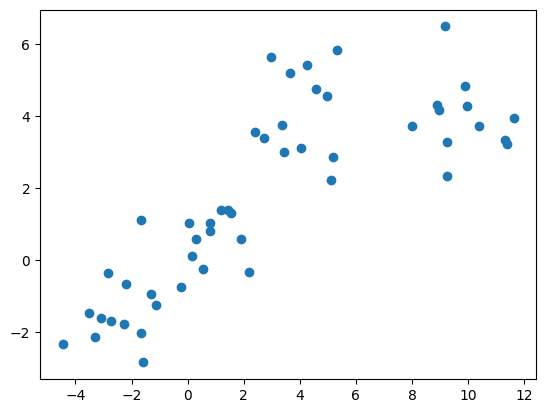

In [229]:
# Plotting Random data
plt.scatter(X1[:,0], X1[:,1], marker='o')

Penjelasan:

Kode diatas digunakan untuk membuat plot sebaran data acak. Data acak tersebut disimpan dalam variabel X1.

Fungsi plt.scatter() digunakan untuk membuat plot sebaran data. Fungsi ini memiliki dua argumen wajib, yaitu:

- x: Nilai-nilai data pada sumbu x.
- y: Nilai-nilai data pada sumbu y.
Dalam kasus ini, nilai-nilai data X1 digunakan sebagai nilai-nilai x dan y.

Argumen marker digunakan untuk menentukan bentuk marker yang akan digunakan untuk plot data. Dalam kasus ini, nilai marker='o' digunakan untuk membuat marker berbentuk bulatan.

Hasil:

Hasil dari kode tersebut adalah plot sebaran data acak seperti yang ditunjukkan pada gambar.

Pada plot tersebut, terlihat bahwa data acak tersebut memiliki pola sebaran yang menyebar secara merata di seluruh area plot. Pola sebaran ini dapat dipengaruhi oleh beberapa faktor, seperti jumlah data, rentang nilai data, dan seed yang digunakan untuk menghasilkan data acak.

**1. Single Linkage**

In [230]:
# Inisialisasi objek AgglomerativeClustering dengan 4 cluster dan single linkage
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'single')

# Melatih model pengelompokan pada dataset 'X1' dengan label 'y1'
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='single', n_clusters=4)

Code diatas adalah melakukan inisialisasi dan melatih model agglomerative clustering dengan menggunakan library scikit-learn.

1. `agglom = AgglomerativeClustering(n_clusters=4, linkage='single')`: Membuat objek AgglomerativeClustering dengan 4 cluster dan menggunakan metode penggabungan 'single', yaitu dengan menggabungkan dua cluster berdasarkan jarak minimum antara elemen-elemen mereka.

2. `agglom.fit(X1, y1)`: Melatih model menggunakan data `X1` dengan label `y1`. Model ini dapat digunakan untuk melakukan prediksi pengelompokan pada data baru atau mengevaluasi pengelompokan pada data pelatihan.

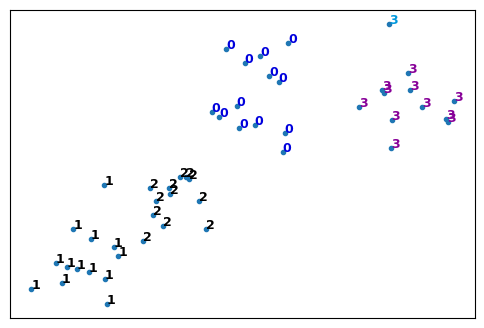

In [231]:
# Membuat figure dengan ukuran 6,4
plt.figure(figsize=(6,4))

# Membuat minimum dan maximum range dari X1
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Mencari rata-rata dari jarak X1
X1 = (X1 - x_min) / (x_max - x_min)

# Looping untuk mendisplay semua datapoints
for i in range(X1.shape[0]) :
  plt.text(X1[i,0], X1[i,1], str(y1[i]),
    color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
    fontdict={'weight': 'bold', 'size': 9})

# Hapus x ticks, y ticks, x dan y axis (garis koordinat)
plt.xticks([])
plt.yticks([])

# Menampilkan plot dari data asli sebelum dicluster
plt.scatter(X1[:,0], X1[:,1], marker='.')

# Menampilkan plot
plt.show()

Penjelasan hasil:

- Menunjukkan distribusi tiitk-titik setelah proses Agglomerative Clustering.
- Setiap titik diberi label cluster yang sesuai.
- Warna titik mencerminkan label cluster dan titik yang berdekatan termasuk dalam cluster yang sama.

Plotting Dendogram (Mencari Jarak)

Plotting Dendogram akan digunakan untuk menentukan jarak antara titik ke titik lain dari sebuah dataset random (X1) yang sudah kita inisialisasi

In [232]:
# Menghitung matriks jarak antara dua set data
dist_matrix = distance_matrix(X1,X1)

# Mencetak hasil matriks jarak
print(dist_matrix)

[[0.         1.00532143 0.27621744 ... 1.09278341 0.71187029 0.55759806]
 [1.00532143 0.         1.02574745 ... 0.18683403 0.30778899 0.48597585]
 [0.27621744 1.02574745 0.         ... 1.06700254 0.71801367 0.53994374]
 ...
 [1.09278341 0.18683403 1.06700254 ... 0.         0.38324559 0.54033923]
 [0.71187029 0.30778899 0.71801367 ... 0.38324559 0.         0.17870483]
 [0.55759806 0.48597585 0.53994374 ... 0.54033923 0.17870483 0.        ]]


Penjelasan kode:
- `distance_matrix(X1, X1)`: Fungsi `distance_matrix` digunakan untuk menghitung matriks jarak antara dua set data. Dalam hal ini, kedua set data tersebut adalah `X1` dengan dirinya sendiri, sehingga menghasilkan matriks jarak antar setiap pasangan data dalam `X1`.

- `dist_matrix`: Variabel ini menyimpan hasil dari matriks jarak yang dihitung.

- `print(dist_matrix)`: Mencetak hasil matriks jarak ke konsol.

Penjelasan hasil:

Matriks jarak tersebut berisi nilai jarak antara setiap pasangan data dalam `X1`. Nilai tersebut dapat diinterpretasikan sebagai seberapa dekat atau jauh satu data point dengan data point lainnya. Nilai 0 diagonal matriks menunjukkan bahwa jarak antara setiap data point dengan dirinya sendiri adalah 0, karena data point tersebut identik.

Hasil yang ditampilkan adalah representasi numerik dari jarak antar data points, di mana nilai semakin tinggi menunjukkan kedua data points semakin jauh satu sama lain, dan nilai rendah atau mendekati nol menunjukkan kedua data points semakin dekat.

In [233]:
# Memberikan parameter pada kelas linkage dari hierarki
X = hierarchy.linkage(dist_matrix, 'single')

<ipython-input-233-d8488375fc88>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(dist_matrix, 'single')


Code diatas menggunakan fungsi `linkage` dari modul `hierarchy` dalam library SciPy untuk melakukan hierarchical clustering berdasarkan matriks jarak (`dist_matrix`) dengan metode 'single' linkage. Hasilnya disimpan dalam variabel `X`, yang dapat digunakan untuk membentuk dendrogram atau melakukan pengelompokan hierarkis.

Text(0.5, 1.0, 'Single Linkage')

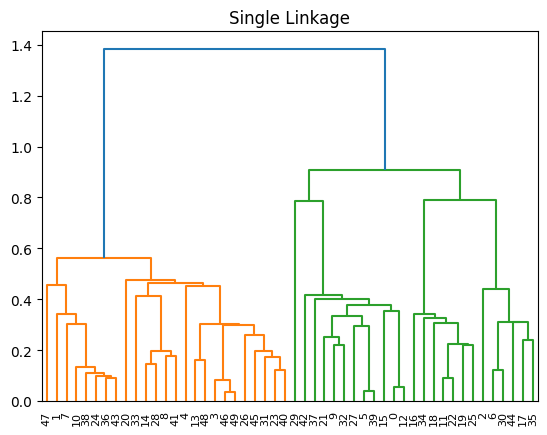

In [234]:
# Single Linkage
dendroX = hierarchy.dendrogram(X)
plt.title("Single Linkage")

Code tersebut membuat dendrogram dari hasil hierarchical clustering dengan menggunakan metode 'single' linkage. Fungsi `hierarchy.dendrogram(X)` menghasilkan visualisasi struktur hierarkis pengelompokan. `plt.title("Single Linkage")` memberikan judul pada plot dendrogram yang mencerminkan penggunaan metode 'single' linkage.

**2. Average Linkage**

In [235]:
# Inisialisasi objek AgglomerativeClustering dengan 4 cluster dan average linkage
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

# Melatih model pengelompokan pada dataset 'X1' dengan label 'y1'
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

Code diatas membuat dan melatih model Agglomerative Clustering dengan 4 cluster menggunakan metode penggabungan 'average', di mana penggabungan antar cluster dilakukan berdasarkan rata-rata jarak antara elemen-elemen yang berbeda dalam kedua cluster yang akan digabungkan. Model ini dilatih pada dataset `X1` dengan label `y1`.

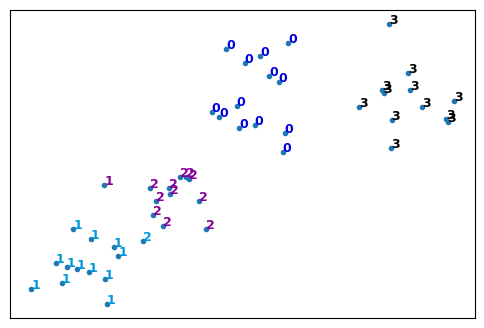

In [236]:
# Membuat figure dengan ukuran 6,4
plt.figure(figsize=(6,4))

# Membuat minimum dan maximum range dari X1
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Mencari rata-rata dari jarak X1
X1 = (X1 - x_min) / (x_max - x_min)

# Looping untuk mendisplay semua datapoints
for i in range(X1.shape[0]) :
  plt.text(X1[i,0], X1[i,1], str(y1[i]),
    color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
    fontdict={'weight': 'bold', 'size': 9})

# Hapus x ticks, y ticks, x dan y axis (garis koordinat)
plt.xticks([])
plt.yticks([])

# Menampilkan plot dari data asli sebelum dicluster
plt.scatter(X1[:,0], X1[:,1], marker='.')

# Menampilkan plot
plt.show()

Plotting Dendogram (Mencari Jarak)

Plotting Dendogram akan digunakan untuk menentukan jarak antara titik ke titik lain dari sebuah dataset random (X1) yang sudah kita inisialisasi

In [237]:
# Menghitung matriks jarak antara dua set data
dist_matrix = distance_matrix(X1,X1)

# Mencetak hasil matriks jarak
print(dist_matrix)

[[0.         1.00532143 0.27621744 ... 1.09278341 0.71187029 0.55759806]
 [1.00532143 0.         1.02574745 ... 0.18683403 0.30778899 0.48597585]
 [0.27621744 1.02574745 0.         ... 1.06700254 0.71801367 0.53994374]
 ...
 [1.09278341 0.18683403 1.06700254 ... 0.         0.38324559 0.54033923]
 [0.71187029 0.30778899 0.71801367 ... 0.38324559 0.         0.17870483]
 [0.55759806 0.48597585 0.53994374 ... 0.54033923 0.17870483 0.        ]]


In [238]:
# Memberikan parameter pada kelas linkage dari hierarki
Y = hierarchy.linkage(dist_matrix, 'average')

<ipython-input-238-020bb604c067>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(dist_matrix, 'average')


Text(0.5, 1.0, 'Average Linkage')

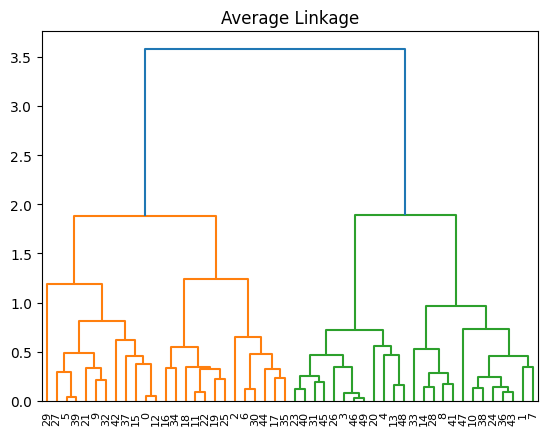

In [239]:
# Average Linkage
dendroY = hierarchy.dendrogram(Y)
plt.title("Average Linkage")

**Perbedaan antara Single Linkage dan Average Linkage dalam Agglomerative Clustering**

Perbedaan antara Single Linkage dan Average Linkage dalam Agglomerative Clustering terletak pada cara kedua metode menghitung jarak antara dua klaster yang akan digabungkan. Single linkage mengukur jarak terkecil antara anggota klaster yang berbeda, yang dapat mengakibatkan pembentukan klaster yang panjang dan berantai. Sebaliknya, Average linkage mengukur rata-rata jarak antara semua pasangan anggota klaster yang berbeda, memberikan perhatian lebih baik terhadap keseluruhan struktur klaster dan cenderung menghasilkan klaster yang lebih seimbang dan kompak.

Dalam konteks data contoh yang dibuat secara acak, di mana terdapat empat klaster yang berpusat di [[4,4], [-2,-1], [1,1], [10,4]], perbedaan ini terlihat pada dendrogram hasil clustering. Dendrogram Single Linkage menunjukkan kecenderungan untuk menggabungkan klaster yang berdekatan terlebih dahulu tanpa mempertimbangkan bentuk atau ukuran klaster, yang dapat menghasilkan klaster yang tidak seimbang. Di sisi lain, Dendrogram Average Linkage menunjukkan kecenderungan untuk menggabungkan klaster yang memiliki jarak rata-rata kecil, menghasilkan klaster yang lebih seimbang dan kompak. Ini memperbaiki masalah Single Linkage yang dapat rentan terhadap noise dan pembentukan klaster yang berantai. Sebagai contoh, klaster yang berisi objek 0 dan 1 digabungkan dengan klaster yang berisi objek 6 dan 7 karena memiliki jarak rata-rata yang lebih kecil, yang lebih memperhitungkan struktur keseluruhan data.

**2. Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan
single linkage dan average linkage untuk dataset cars_clustering! Jelaskan
perbedaannya!**

Read Data

In [240]:
# Membaca dataset dengan library pandas
pdf = pd.read_csv("/content/drive/MyDrive/Praktikum ML/cars_clus.csv")

In [241]:
# Menampilkan dimensi dataset
pdf.shape

(159, 16)

In [242]:
# Menampilkan 10 dataset teratas
pdf.head(10)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0
5,Audi,A6,18.78,23.555,0,33.95,2.8,200,108.7,76.1,192,3.561,18.5,22,2.933,0
6,Audi,A8,1.38,39,0,62,4.2,310,113,74,198.2,3.902,23.7,21,0.322,0
7,BMW,323i,19.747,$null$,0,26.99,2.5,170,107.3,68.4,176,3.179,16.6,26.1,2.983,0
8,BMW,328i,9.231,28.675,0,33.4,2.8,193,107.3,68.5,176,3.197,16.6,24,2.223,0
9,BMW,528i,17.527,36.125,0,38.9,2.8,193,111.4,70.9,188,3.472,18.5,24.8,2.864,0


Data Cleaning

In [243]:
# Mencetak dimensi dataset sebelum proses pembersihan
print("Dimensi dataset sebelum cleaning:", pdf.size)

# Mengubah kolom tertentu menjadi tipe data numerik, dan mengatasi nilai non-numerik dengan menggantinya NaN
pdf[['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width',
     'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']] = pdf[['sales', 'resale',
      'type', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt',
      'fuel_cap', 'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

# Menghapus baris yang mengandung nilai NaN
pdf = pdf.dropna()

# Mengatur ulang indeks setelah penghapusan baris
pdf = pdf.reset_index(drop=True)

# Mencetak dimensi dataset setelah proses pembersihan
print("Ukuran pdf setelah cleaning:", pdf.size)

# Menampilkan 10 baris pertama dari dataset yang telah dibersihkan
pdf.head(10)

Dimensi dataset sebelum cleaning: 2544
Ukuran pdf setelah cleaning: 1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0
5,Audi,A8,1.380,39.000,0.0,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,0.322,0
6,BMW,328i,9.231,28.675,0.0,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,2.223,0
7,BMW,528i,17.527,36.125,0.0,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,24.8,2.864,0
8,Buick,Century,91.561,12.475,0.0,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,4.517,0
9,Buick,Regal,39.350,13.740,0.0,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,3.672,0


Feature Selection

In [244]:
# Feature Selection
featureset = pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
featureset.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0


Normalization

In [245]:
from sklearn.preprocessing import MinMaxScaler

# x berisikan nilai dari featurest yang nantinya akan digunakan untuk normalisasi
x = featureset.values

# Membuat objek MinMaxScaler
min_max_scaler = MinMaxScaler()

# Proses normalisasi
# Menggunakan fit_transform untuk mengubah nilai variabel dalam rentang 0 hingga 1
feature_mtx = min_max_scaler.fit_transform(x)

# Menampilkan 5 baris pertama dari hasil normalisasi
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

**A. Agglomerative Clustering with Scipy**

Scipy digunakan untuk menghitung jarak antara cluster yang baru terbentuk

In [246]:
# Clustering with Scipy
import scipy
import pylab
import scipy.cluster.hierarchy

# Mendapatkan jumlah baris (leng) dalam feature_mtx
leng = feature_mtx.shape[0]

# Inisialisasi matriks jarak D dengan 0
D = scipy.zeros([leng,leng])

# Menghitung jarak euclidean antara setiap pasangan data dalam feature_mtx
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

<ipython-input-246-a89ec2993367>:10: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


Single Linkage

In [247]:
# Single Linkage
Z = hierarchy.linkage(D, 'single')

<ipython-input-247-b2e3cff2d09d>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'single')


In [248]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang ditentukan
print("Single Linkage")

# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3

# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

Single Linkage


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

Code diatas menggunakan metode Single Linkage dalam hierarchical clustering untuk menentukan cluster pada dataset. Setelah mendefinisikan jumlah cluster dan mencetak informasi tentang metode linkage yang digunakan, batas jarak maksimum (max_d) untuk membentuk cluster ditetapkan sebesar 3. Selanjutnya, fungsi fcluster dari modul scipy.cluster.hierarchy digunakan untuk menghasilkan cluster berdasarkan matriks linkage (Z) dengan memperhatikan batas jarak maksimum yang telah ditentukan. Hasilnya, sebuah array dibentuk yang menunjukkan keanggotaan setiap observasi ke dalam cluster tertentu. Dalam contoh ini, nilai-nilai dalam array tersebut adalah label cluster yang diberikan berdasarkan batas jarak maksimum 3. Output tersebut mencerminkan hasil dari proses clustering, di mana setiap observasi diberi label cluster yang sesuai dengan pembagian berdasarkan jarak maksimum yang telah diatur sebelumnya.

In [249]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Single Linkage")

# Menentukan jumlah klaster yang diinginkan (k)
k = 5

# Menentukan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, k, criterion = 'maxclust')
clusters

Single Linkage


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2], dtype=int32)

Penjelasan Hasil:
Hasilnya adalah array yang menyatakan klaster yang ditentukan untuk setiap sampel. Misalnya, sampel pertama termasuk dalam klaster 2, sampel kedua dalam klaster 2, dan seterusnya. Klaster tersebut ditentukan berdasarkan metode Single Linkage dengan jumlah klaster maksimum sebanyak 5, sesuai dengan nilai k yang ditentukan sebelumnya.

Plotting Dendogram Single Linkage

Melakukan plotting dendogram terhadap model dan akan menampilkan lebih jelas dari hasil clustering yang sudah terbentuk.

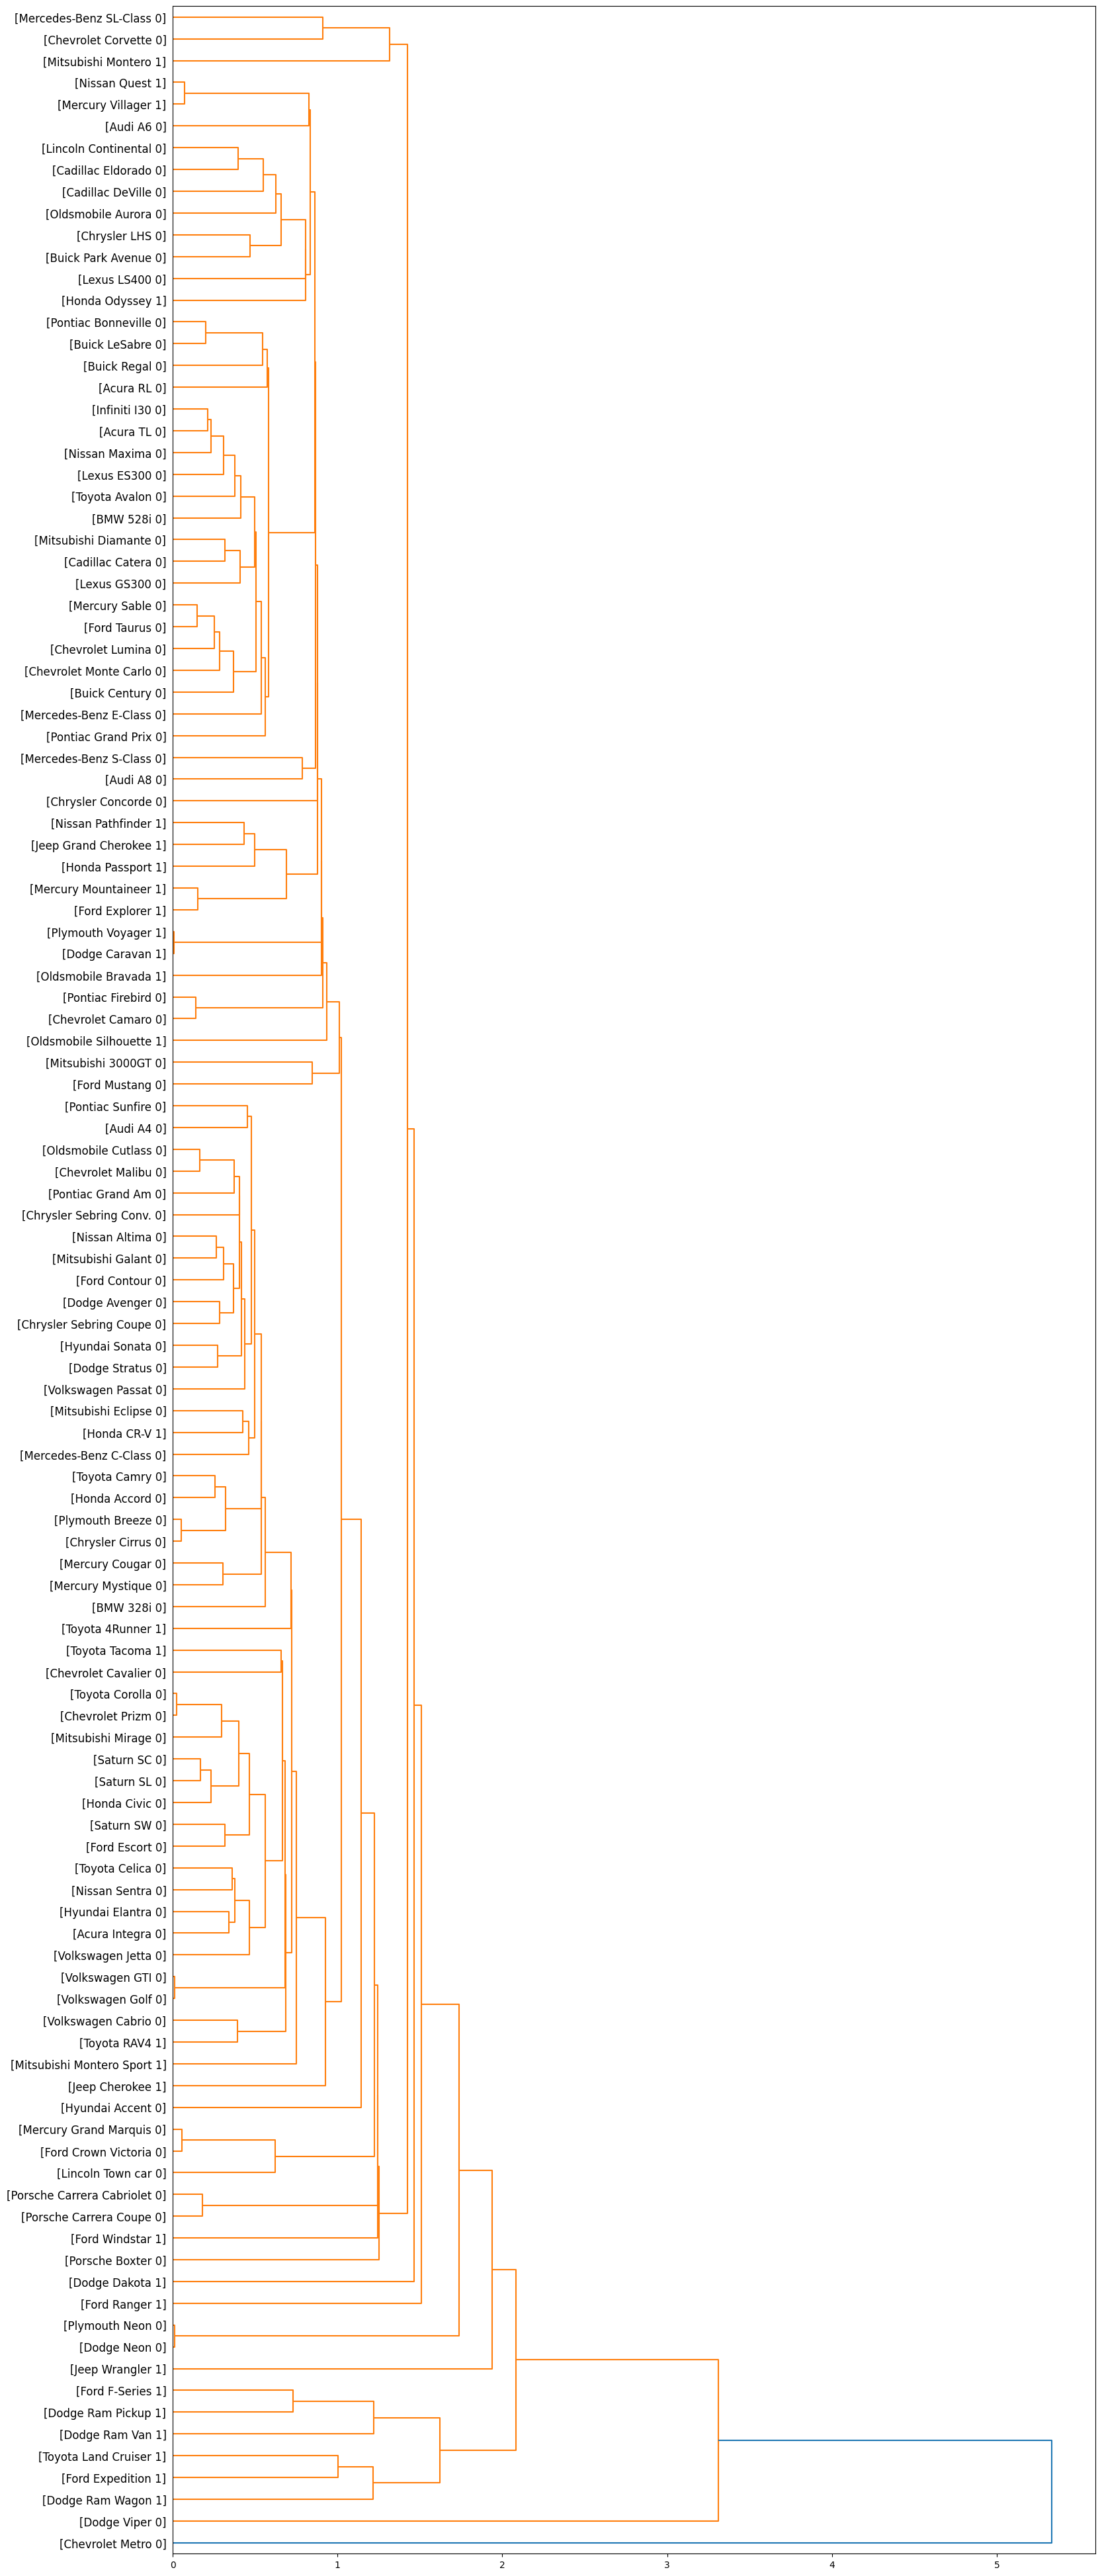

In [250]:
# Single Linkage

# Menentukan ukuran figure yang akan dilihat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id],
                         int(float(pdf['type'][id])))

# Membuat dendrogram
dendro = hierarchy.dendrogram(Z, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

Average Linkage

In [251]:
# Average Linkage
Z = hierarchy.linkage(D, 'average')

<ipython-input-251-8b2002298af9>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'average')


In [252]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang ditentukan
print("Average Linkage")

# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3

# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

Average Linkage


array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

Penjelasan hasil:

Array clusters berisi label klaster untuk setiap data point. Setiap data point akan diberikan label klaster yang sesuai dengan pembentukan klaster berdasarkan batas jarak maksimum yang telah ditentukan. Misalnya, data point pertama memiliki label klaster 3, data point kedua memiliki label klaster 5, dan seterusnya. Jumlah klaster dan label klaster akan bergantung pada batas jarak maksimum yang telah diatur.

In [253]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Average Linkage")

# Menentukan jumlah klaster yang diinginkan (k)
k = 5

# Menentukan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, k, criterion = 'maxclust')
clusters

Average Linkage


array([2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 2,
       5, 4, 4, 4, 4, 4, 2, 4, 4, 1, 1, 1, 1, 3, 4, 2, 4, 4, 4, 3, 4, 3,
       1, 4, 1, 2, 4, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 4, 4, 3, 3, 3, 2, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2,
       4, 1, 2, 4, 4, 2, 2], dtype=int32)

Penjelasan hasil:

Array clusters berisi label klaster untuk setiap sampel. Sebagai contoh, label klaster untuk sampel pertama adalah 2, sampel kedua adalah 4, dan seterusnya. Klaster ini ditentukan berdasarkan jumlah klaster yang diinginkan (k=5) dengan metode Average Linkage. Dengan demikian, setiap sampel diberi label klaster yang menunjukkan keanggotaannya dalam salah satu dari lima klaster yang dihasilkan.

Plotting Dendogram Single Linkage

Melakukan plotting dendogram terhadap model dan akan menampilkan lebih jelas dari hasil clustering yang sudah terbentuk.

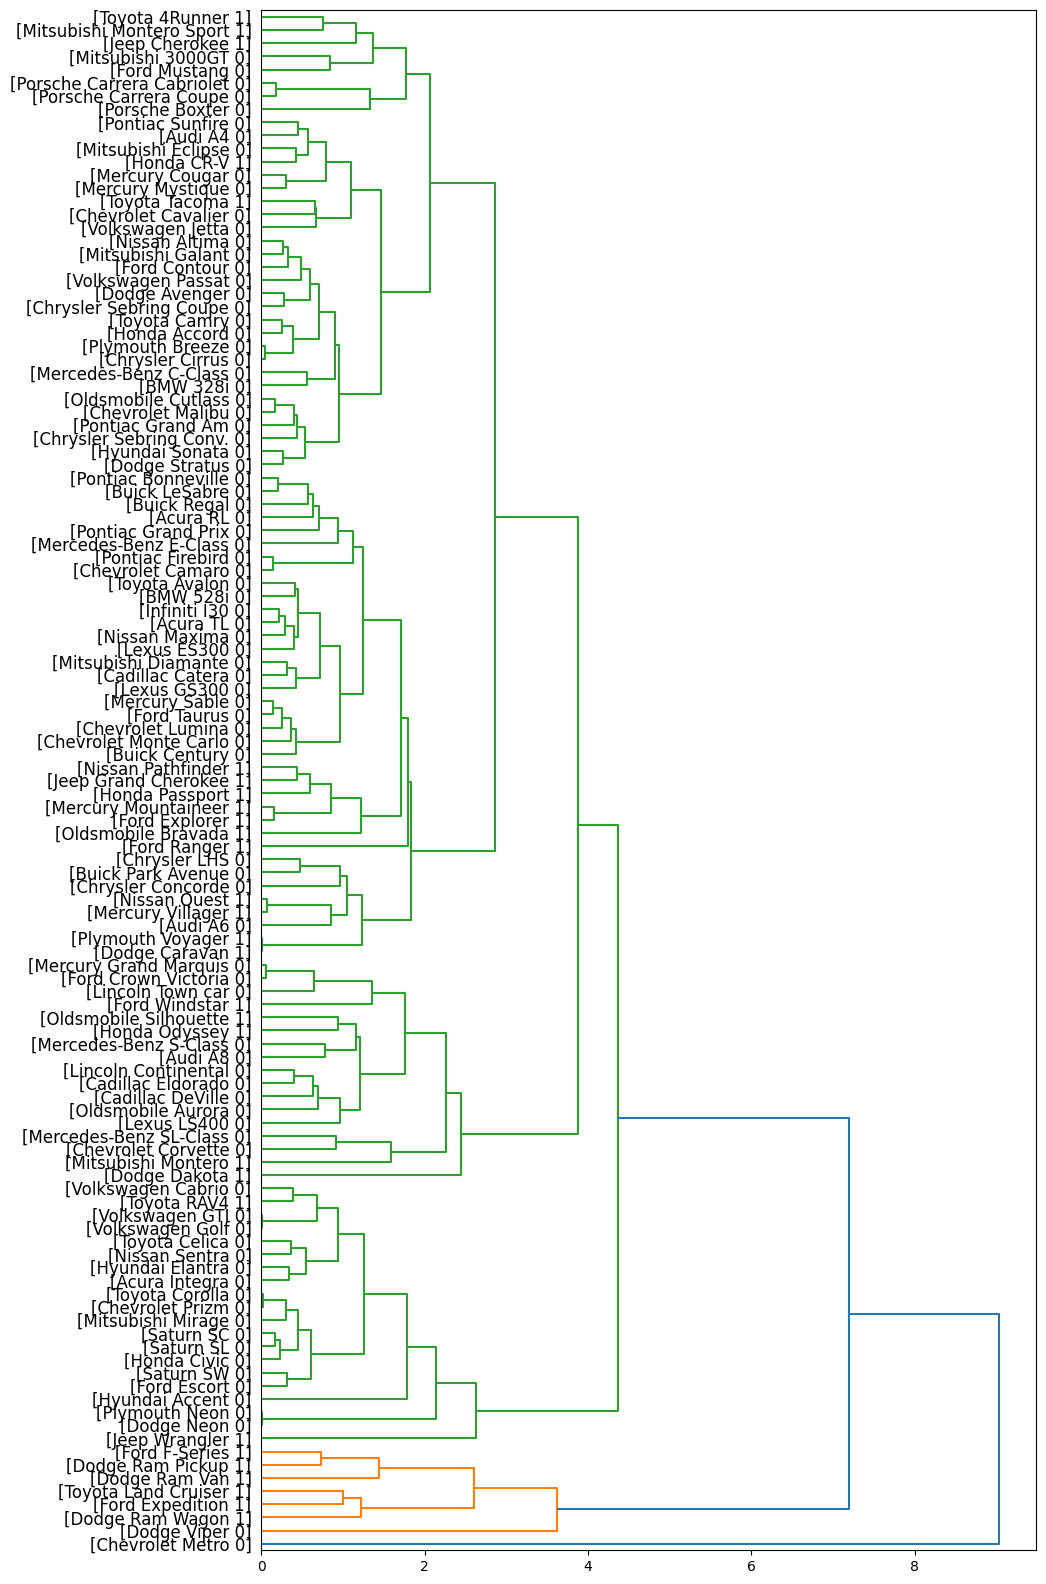

In [254]:
# Single Linkage

# Menentukan ukuran figure yang akan dilihat
fig = pylab.figure(figsize=(10,20))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id],
                         int(float(pdf['type'][id])))

# Membuat dendrogram
dendro = hierarchy.dendrogram(Z, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

**B. Agglomerative Clustering with Scikit Learn**

Library scikit-learn digunakan untuk mengelompokkan dataset, Agglomerative Clustering melakukan pengelompokan hierarkis menggunakan pendekatan bottom-up. Berikut ini merupakan masukan untuk menampilkan matriks dari clustering yang akan dilakukan.

In [255]:
# Mencari jarak matrix
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Mencetak matriks jarak yang dihasilkan
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


Single Linkage

In [256]:
# Single Linkage
# Membuat objek dari kelas AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'single')

# Melakukan clustering
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

In [257]:
# Menentukan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
pdf['cluster_'] = agglom.labels_

# Menampilkan 5 baris pertama
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,0


Plotting dengan scatter plot

<ipython-input-258-c65808ad0dab>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'mpg')

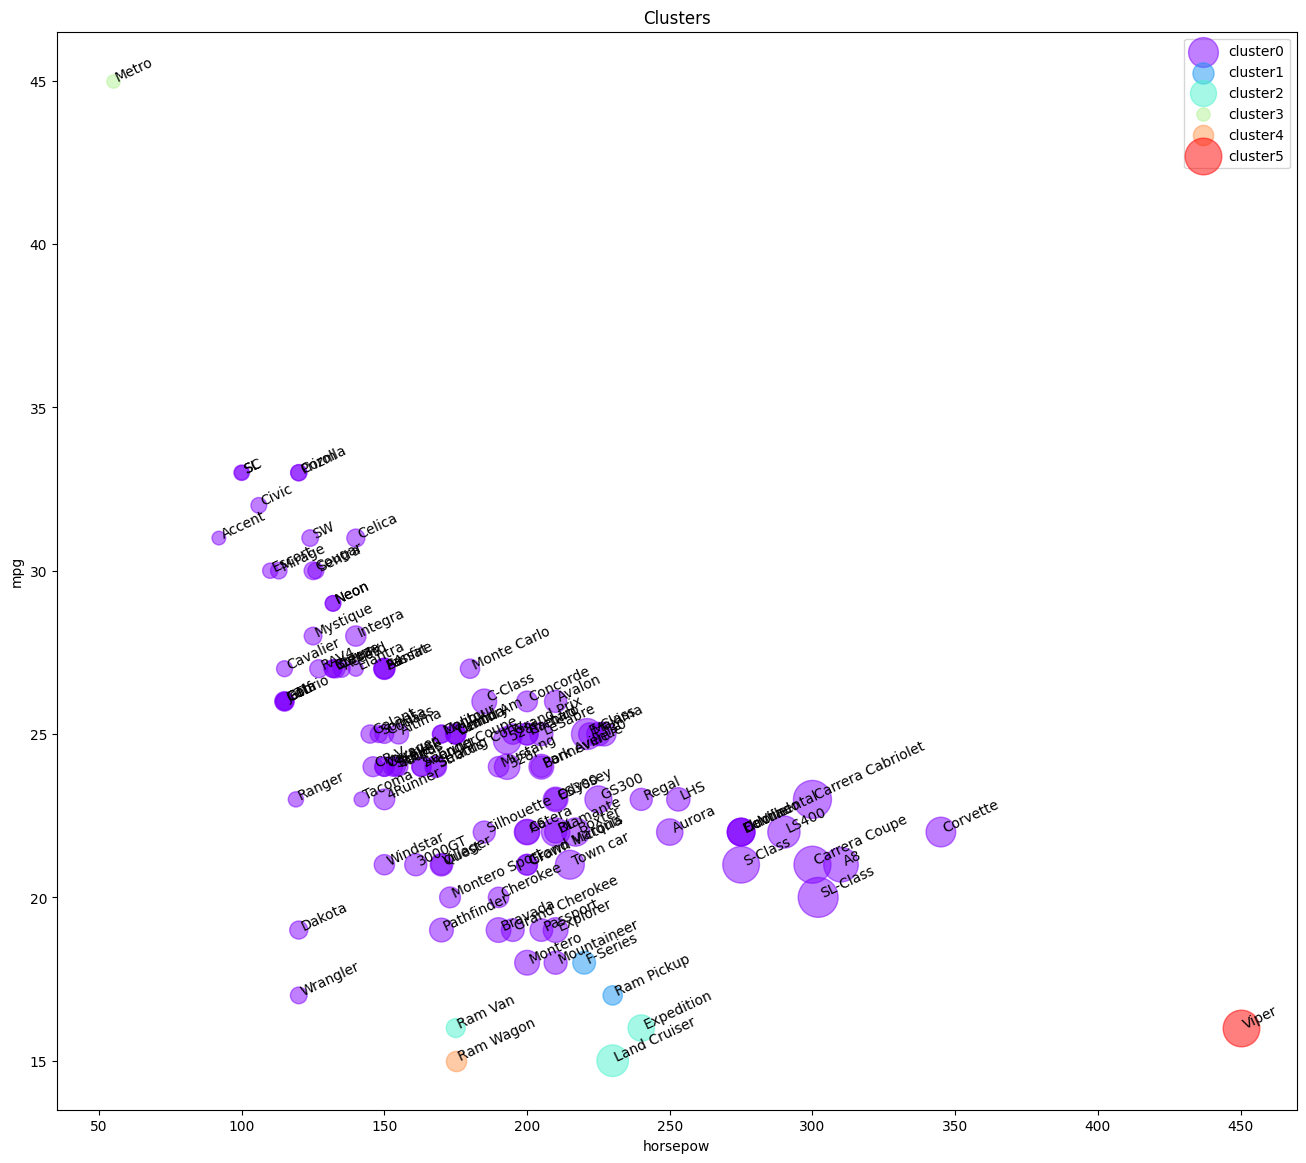

In [258]:
# Mengimport modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi warna dan label cluster
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))

# Membuat daftar label cluster
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi setiap cluster
for color, label in zip(colors, cluster_labels):
  subset = pdf[pdf.cluster_ == label]
  for i in subset.index:
    plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)

# Penyusunan legenda dan label grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [259]:
# Menghitung tipe di setiap cluster
pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     86
          1.0     23
1         1.0      2
2         1.0      3
3         0.0      1
4         1.0      1
5         0.0      1
Name: cluster_, dtype: int64

In [260]:
# Karakteristik masing-masing cluster
agg_cars = pdf.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()

agg_cars

<ipython-input-260-b3543defce35>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = pdf.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   181.197674  2.902326  25.358140  26.286779
         1.0   167.478261  3.095652  21.000000  22.811261
1        1.0   225.000000  4.900000  17.500000  23.197500
2        1.0   215.000000  4.400000  15.666667  35.479333
3        0.0    55.000000  1.000000  45.000000   9.235000
4        1.0   175.000000  3.900000  15.000000  21.315000
5        0.0   450.000000  8.000000  16.000000  69.725000

<ipython-input-261-623f74a7feb8>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster' + str(label))  # Perbaikan pada sintaks


Text(0, 0.5, 'mpg')

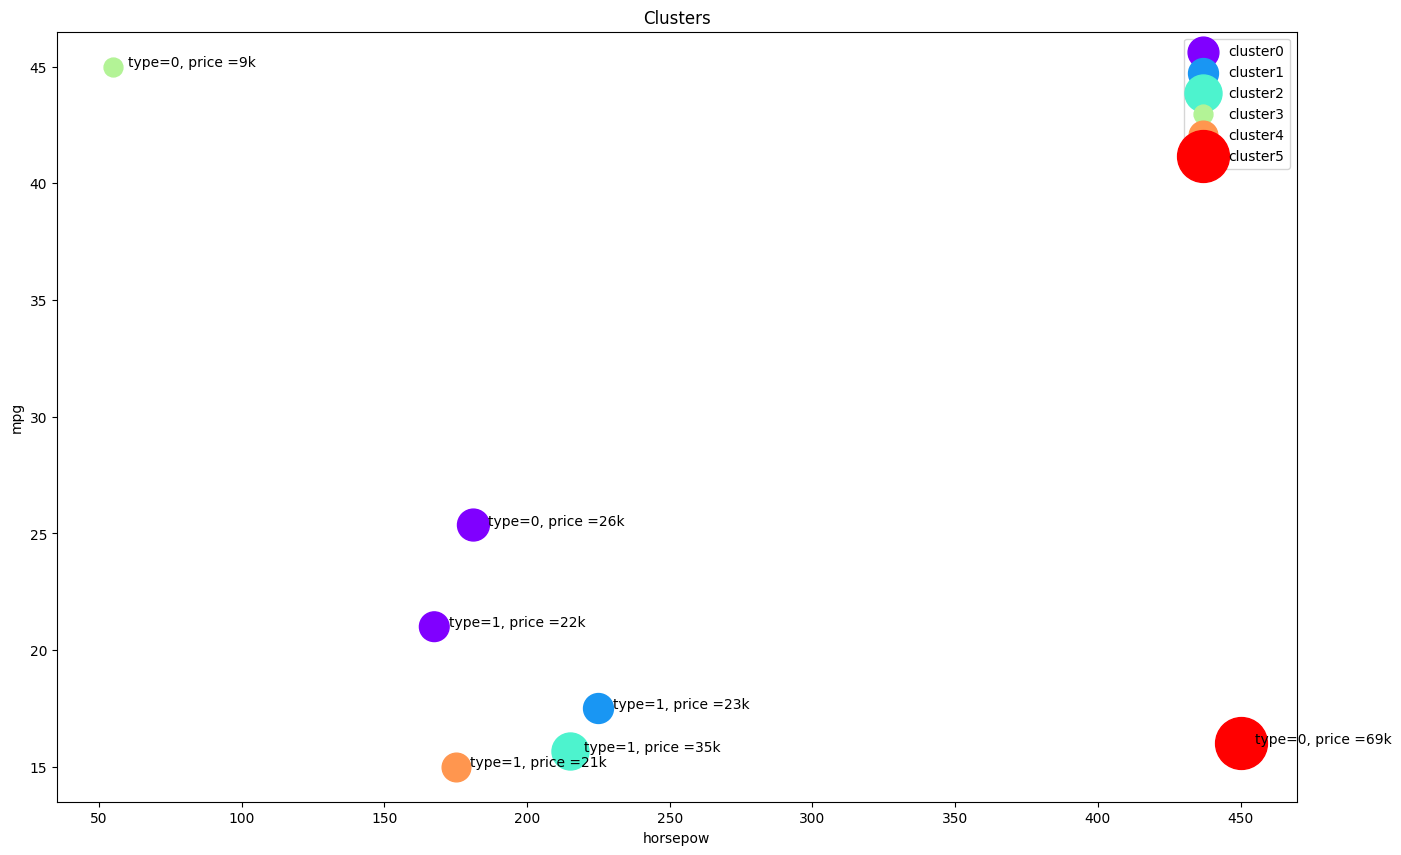

In [261]:
# Membuat objek gambar (figure) dengan ukuran 16x10
plt.figure(figsize=(16, 10))

# Visualisasi setiap cluster
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0] + 5, subset.loc[i][2], 'type=' + str(int(i)) + ', price =' + str(int(subset.loc[i][3])) + 'k')  # Perbaikan pada sintaks
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster' + str(label))  # Perbaikan pada sintaks

# Penyusunan legenda dan label grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Average Linkage

In [262]:
# Average Linkage
# Membuat objek dari kelas AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'average')

# Melakukan clustering
agglom.fit(feature_mtx)
agglom.labels_

array([0, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 1, 0,
       3, 0, 0, 4, 0, 4, 0, 0, 0, 1, 5, 2, 2, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       2, 4, 5, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 4, 4, 4, 0, 4,
       4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

In [263]:
# Menentukan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
pdf['cluster_'] = agglom.labels_

# Menampilkan 5 baris pertama
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,4
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,4
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,4


<ipython-input-264-c65808ad0dab>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'mpg')

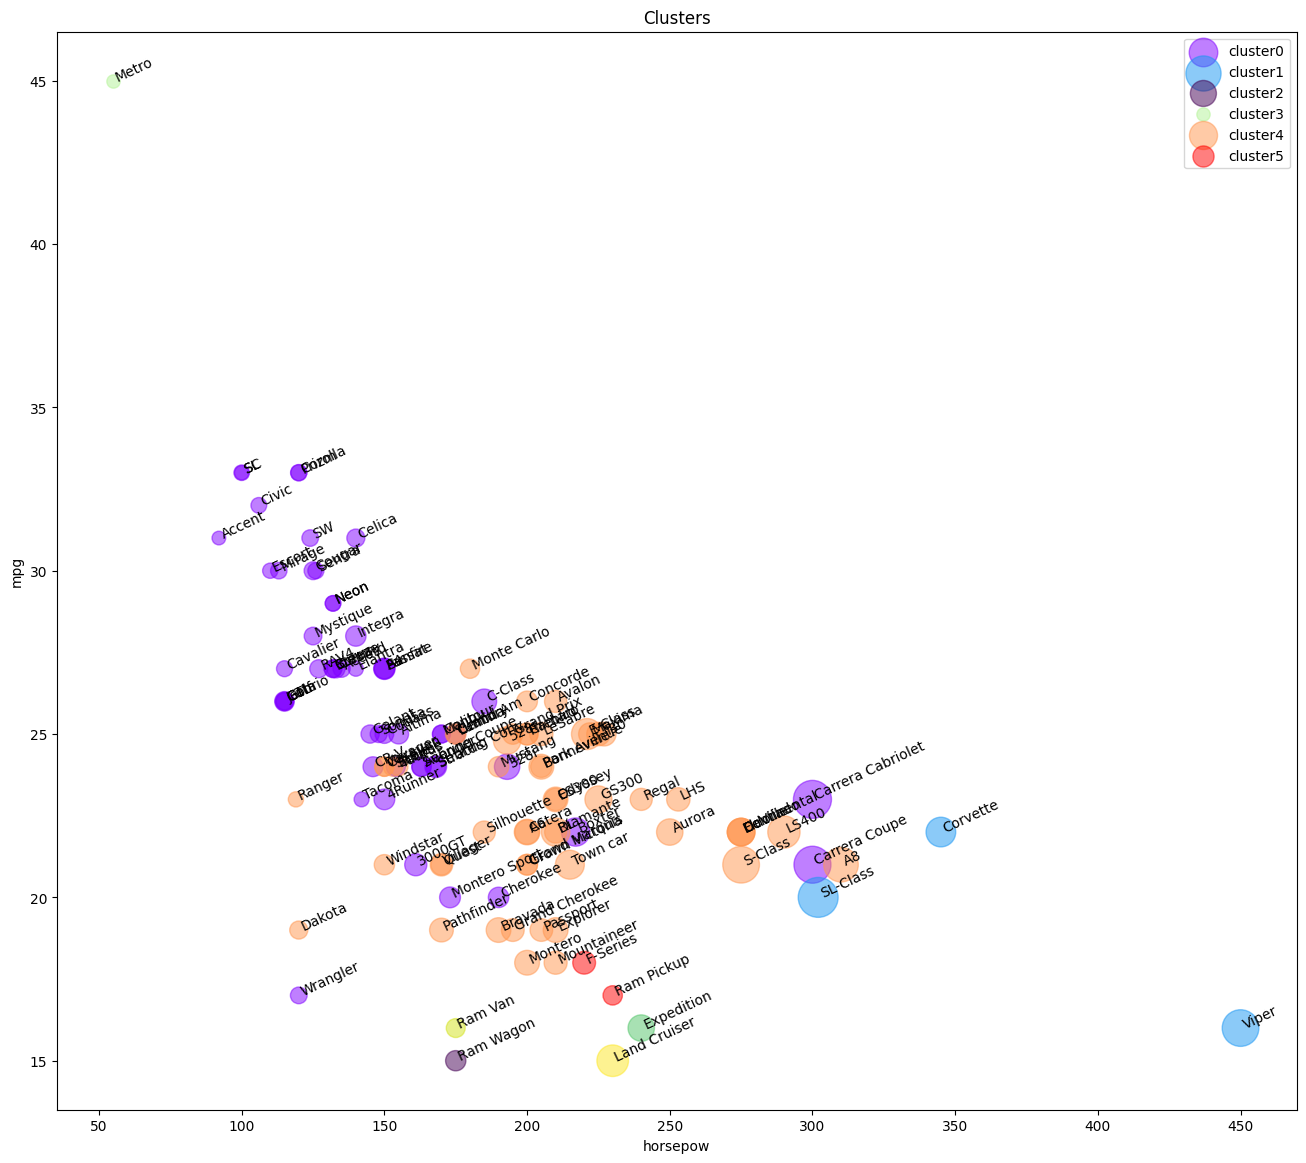

In [264]:
# Mengimport modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi warna dan label cluster
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))

# Membuat daftar label cluster
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi setiap cluster
for color, label in zip(colors, cluster_labels):
  subset = pdf[pdf.cluster_ == label]
  for i in subset.index:
    plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)

# Penyusunan legenda dan label grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [265]:
# Menghitung tipe di setiap cluster
pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     47
          1.0      7
1         0.0      3
2         1.0      4
3         0.0      1
4         0.0     37
          1.0     16
5         1.0      2
Name: cluster_, dtype: int64

In [266]:
# Karakteristik masing-masing cluster
agg_cars = pdf.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()

agg_cars

<ipython-input-266-b3543defce35>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = pdf.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   149.714286  2.657143  22.000000  18.551571
1        0.0   365.666667  6.233333  19.333333  66.010000
2        1.0   205.000000  4.275000  15.500000  31.938250
3        0.0    55.000000  1.000000  45.000000   9.235000
4        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   175.250000  3.287500  20.562500  24.674875
5        1.0   225.000000  4.900000  17.500000  23.197500

<ipython-input-267-623f74a7feb8>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster' + str(label))  # Perbaikan pada sintaks


Text(0, 0.5, 'mpg')

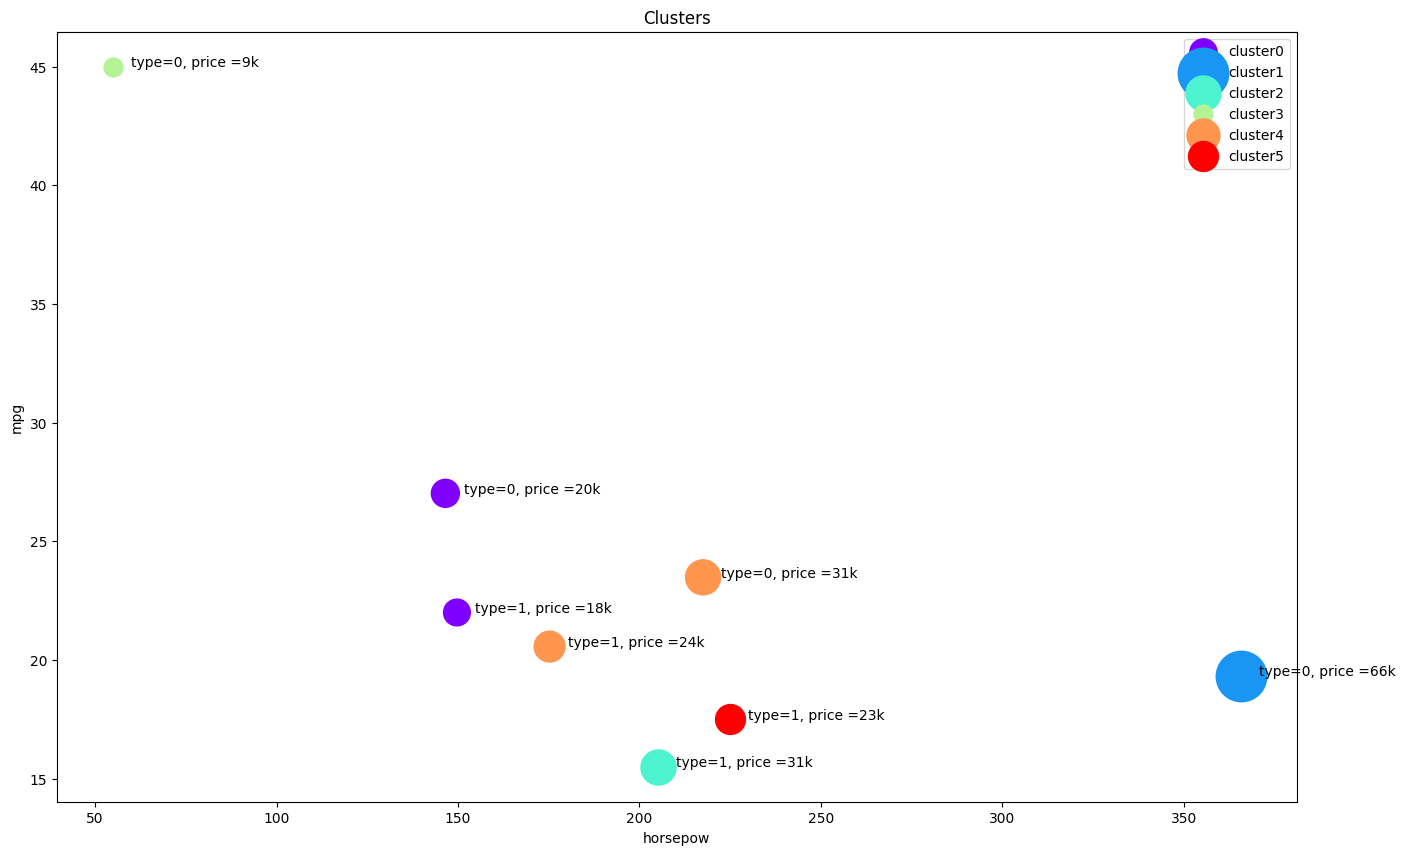

In [267]:
# Membuat objek gambar (figure) dengan ukuran 16x10
plt.figure(figsize=(16, 10))

# Visualisasi setiap cluster
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0] + 5, subset.loc[i][2], 'type=' + str(int(i)) + ', price =' + str(int(subset.loc[i][3])) + 'k')  # Perbaikan pada sintaks
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster' + str(label))  # Perbaikan pada sintaks

# Penyusunan legenda dan label grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

**Perbedaan Agglomerative clustering Single Linkage dan Average linkage menggunakan Scipy dan Scikit-learn**

Agglomerative clustering merupakan teknik pengelompokan hierarkis yang secara bertahap menggabungkan objek-objek yang paling mirip berdasarkan jarak antara mereka. Dalam konteks Single Linkage, kriteria linkage ini menghitung jarak antara dua klaster sebagai jarak terkecil antara anggota dari kedua klaster. Meskipun metode ini dapat bekerja cepat dan efisien pada data yang tidak berbentuk globular, namun cenderung rentan terhadap noise dan dapat menghasilkan klaster yang panjang dan berantai.

Sementara itu, Average Linkage menggunakan kriteria linkage yang menghitung jarak antara dua klaster sebagai rata-rata jarak antara semua pasangan anggota dari kedua klaster. Metode ini dapat memberikan hasil yang baik pada data yang berbentuk globular dan terpisah dengan jelas, namun memiliki variasi hasil yang lebih signifikan tergantung pada struktur data yang diberikan.

Kedua metode tersebut dapat diimplementasikan dengan menggunakan modul Python, seperti Scipy dan Scikit-learn. Scipy menyediakan fungsi linkage dan dendrogram untuk menghitung matriks linkage dan membuat dendrogram, sementara Scikit-learn menyediakan kelas AgglomerativeClustering untuk menghitung label klaster dan fitur-fitur aglomerasi. Dengan demikian, baik Scipy maupun Scikit-learn dapat digunakan sebagai alat yang efektif untuk melakukan Agglomerative clustering dengan berbagai kriteria linkage tergantung pada karakteristik data yang dihadapi.

**3. Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan
single linkage, average linkage, dan complete linkage untuk dataset iris! Jelaskan perbedaannya!**

Read Data

In [268]:
# Import dataset Iris
from sklearn.datasets import load_iris

# Mengembalikan objek dataset iris
iris = load_iris()

Convert Data

In [269]:
# Convert Dataset
pdf_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
pdf_iris['target'] = iris.target

# Menampilkan 5 baris pertama dari DataFrame
pdf_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Normalisasi

In [270]:
# Normalize the dataset
i = pdf_iris.values

# Membuat objek MinMaxScaler
min_max_scaler = MinMaxScaler()

# Mengubah nilai variabel dalam rentang 0 hingga 1
feature_mtx = min_max_scaler.fit_transform(i)

# Menampilkan 5 baris pertama data hasil normalisasi
feature_mtx[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.        ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667, 0.        ],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667, 0.        ]])

Penjelasan hasil:

Menunjukkan lima baris pertama dari dataset yang telah dinormalisasi dimana nilai fitur-fitur dalam dataset tersebut berada dalam rentang antara 0 dan 1

**A. Agglomerative Clustering with Scipy**

Scipy digunakan untuk menghitung jarak antara cluster yang baru terbentuk

In [271]:
# Mengimpor modul untuk keperluan ilmiah dan analisis data
import scipy
# Mengimpor modul untuk fungsi-fungsi pemrograman grafis
import pylab
# Mengimpor modul untuk analisis clustering hirarkis
import scipy.cluster.hierarchy

# Mendapatkan jumlah baris (leng) dalam feature_mtx
leng = feature_mtx.shape[0]
# Inisialisasi matriks jarak D dengan nol
D = scipy.zeros([leng,leng])

# Menghitung jarak euclidean antara setiap pasangan data dalam feature_mtx
for i in range(leng):
  for j in range(leng):
    # Menggunakan fungsi scipy.spatial.distance.euclidean untuk menghitung jarak Euclidean antara dua data dan disimpan dalam matriks jarak D
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

<ipython-input-271-0a3b7134ba29>:11: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


Plotting Dendogram

Single Linkage

<ipython-input-290-15c40f0c0e00>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  iris_single = hierarchy.linkage(D, 'single')


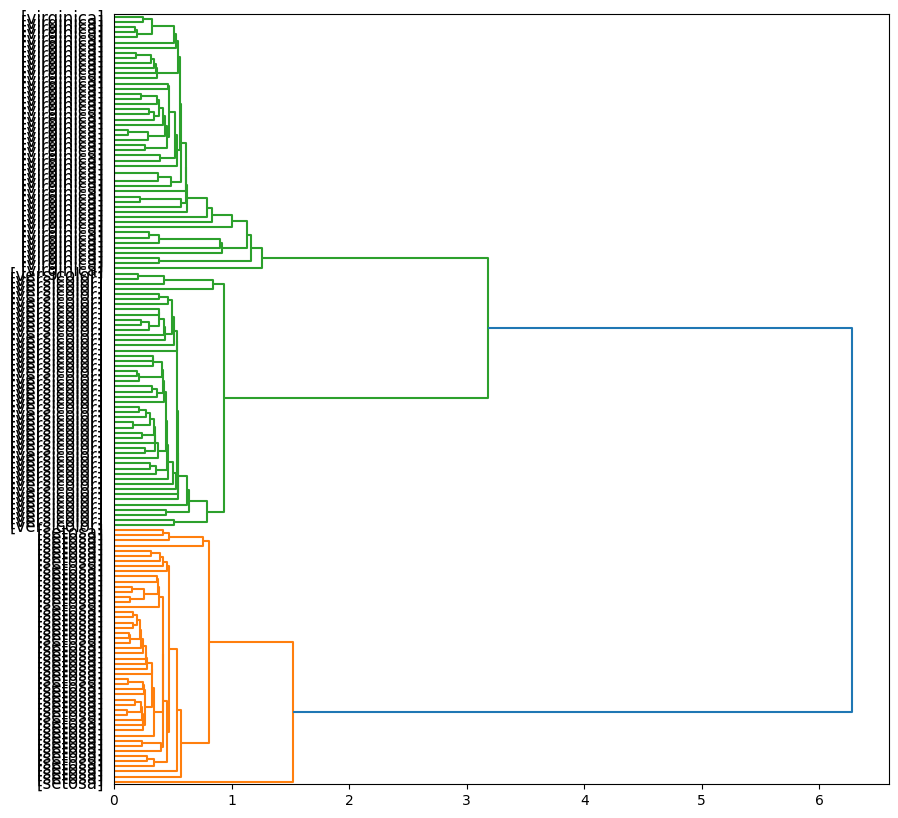

In [290]:
# Single Linkage
iris_single = hierarchy.linkage(D, 'single')

# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(10,10))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s]' % (iris.target_names[pdf_iris['target'][id]])

# Membuat dendrogram
dendro = hierarchy.dendrogram(iris_single, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

Pada dendrogram tersebut, terlihat bahwa data dibagi menjadi 4 cluster pada tingkatan tertinggi. Cluster-cluster tersebut kemudian dibagi lagi menjadi cluster-cluster yang lebih kecil pada tingkatan yang lebih rendah.

Pada tingkatan terendah, terlihat bahwa ada 12 cluster yang terbentuk. Cluster-cluster tersebut ditandai dengan warna yang berbeda.

Penjelasan:

Titik-titik: Titik-titik pada dendrogram mewakili data.
Jarak: Jarak antara dua titik menunjukkan kedekatan antara dua data.
Pohon: Pohon pada dendrogram menunjukkan hierarki dari cluster-cluster.
Pada dendrogram tersebut, terlihat bahwa jarak antara dua titik semakin kecil seiring dengan bertambahnya tingkatan. Hal ini menunjukkan bahwa kedekatan antara dua data semakin besar seiring dengan bertambahnya tingkatan.



Average Linkage

<ipython-input-291-1a79d961d465>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  iris_avg = hierarchy.linkage(D, 'average')


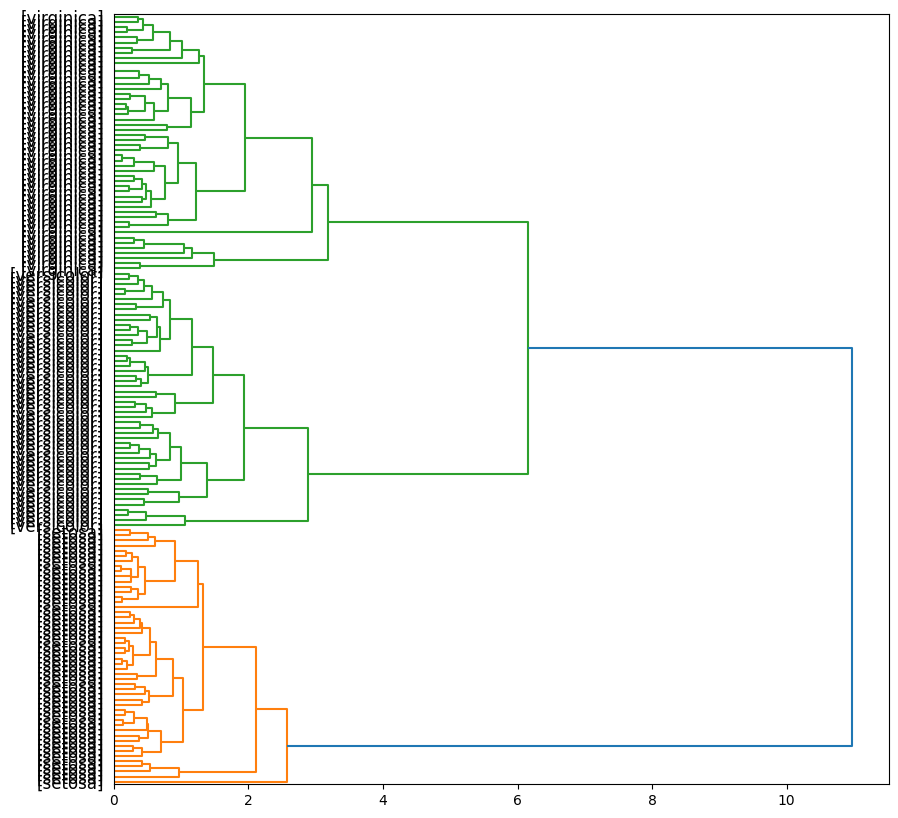

In [291]:
# Average Linkage
iris_avg = hierarchy.linkage(D, 'average')

# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(10,10))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s]' % (iris.target_names[pdf_iris['target'][id]])

# Membuat dendrogram
dendro = hierarchy.dendrogram(iris_avg, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

Penjelasan hasil:

Metode ini menghubungkan dua klaster berdasarkan rata-rata jarak antara semua objek dari klaster yang berbeda.
Hasil dendrogram menunjukkan bahwa metode ini menghasilkan klaster yang lebih seimbang dan lebih konsisten dengan label kelas yang sebenarnya.
Klaster yang terbentuk sesuai dengan 3 label kelas yang ada, yaitu setosa, versicolor, dan virginica. Namun, masih ada beberapa objek yang salah dikelompokkan, seperti objek dengan label kelas versicolor yang tergabung dalam klaster virginica, atau sebaliknya.

Complete linkage

<ipython-input-274-56924c72a8be>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  iris_complete = hierarchy.linkage(D, 'complete')


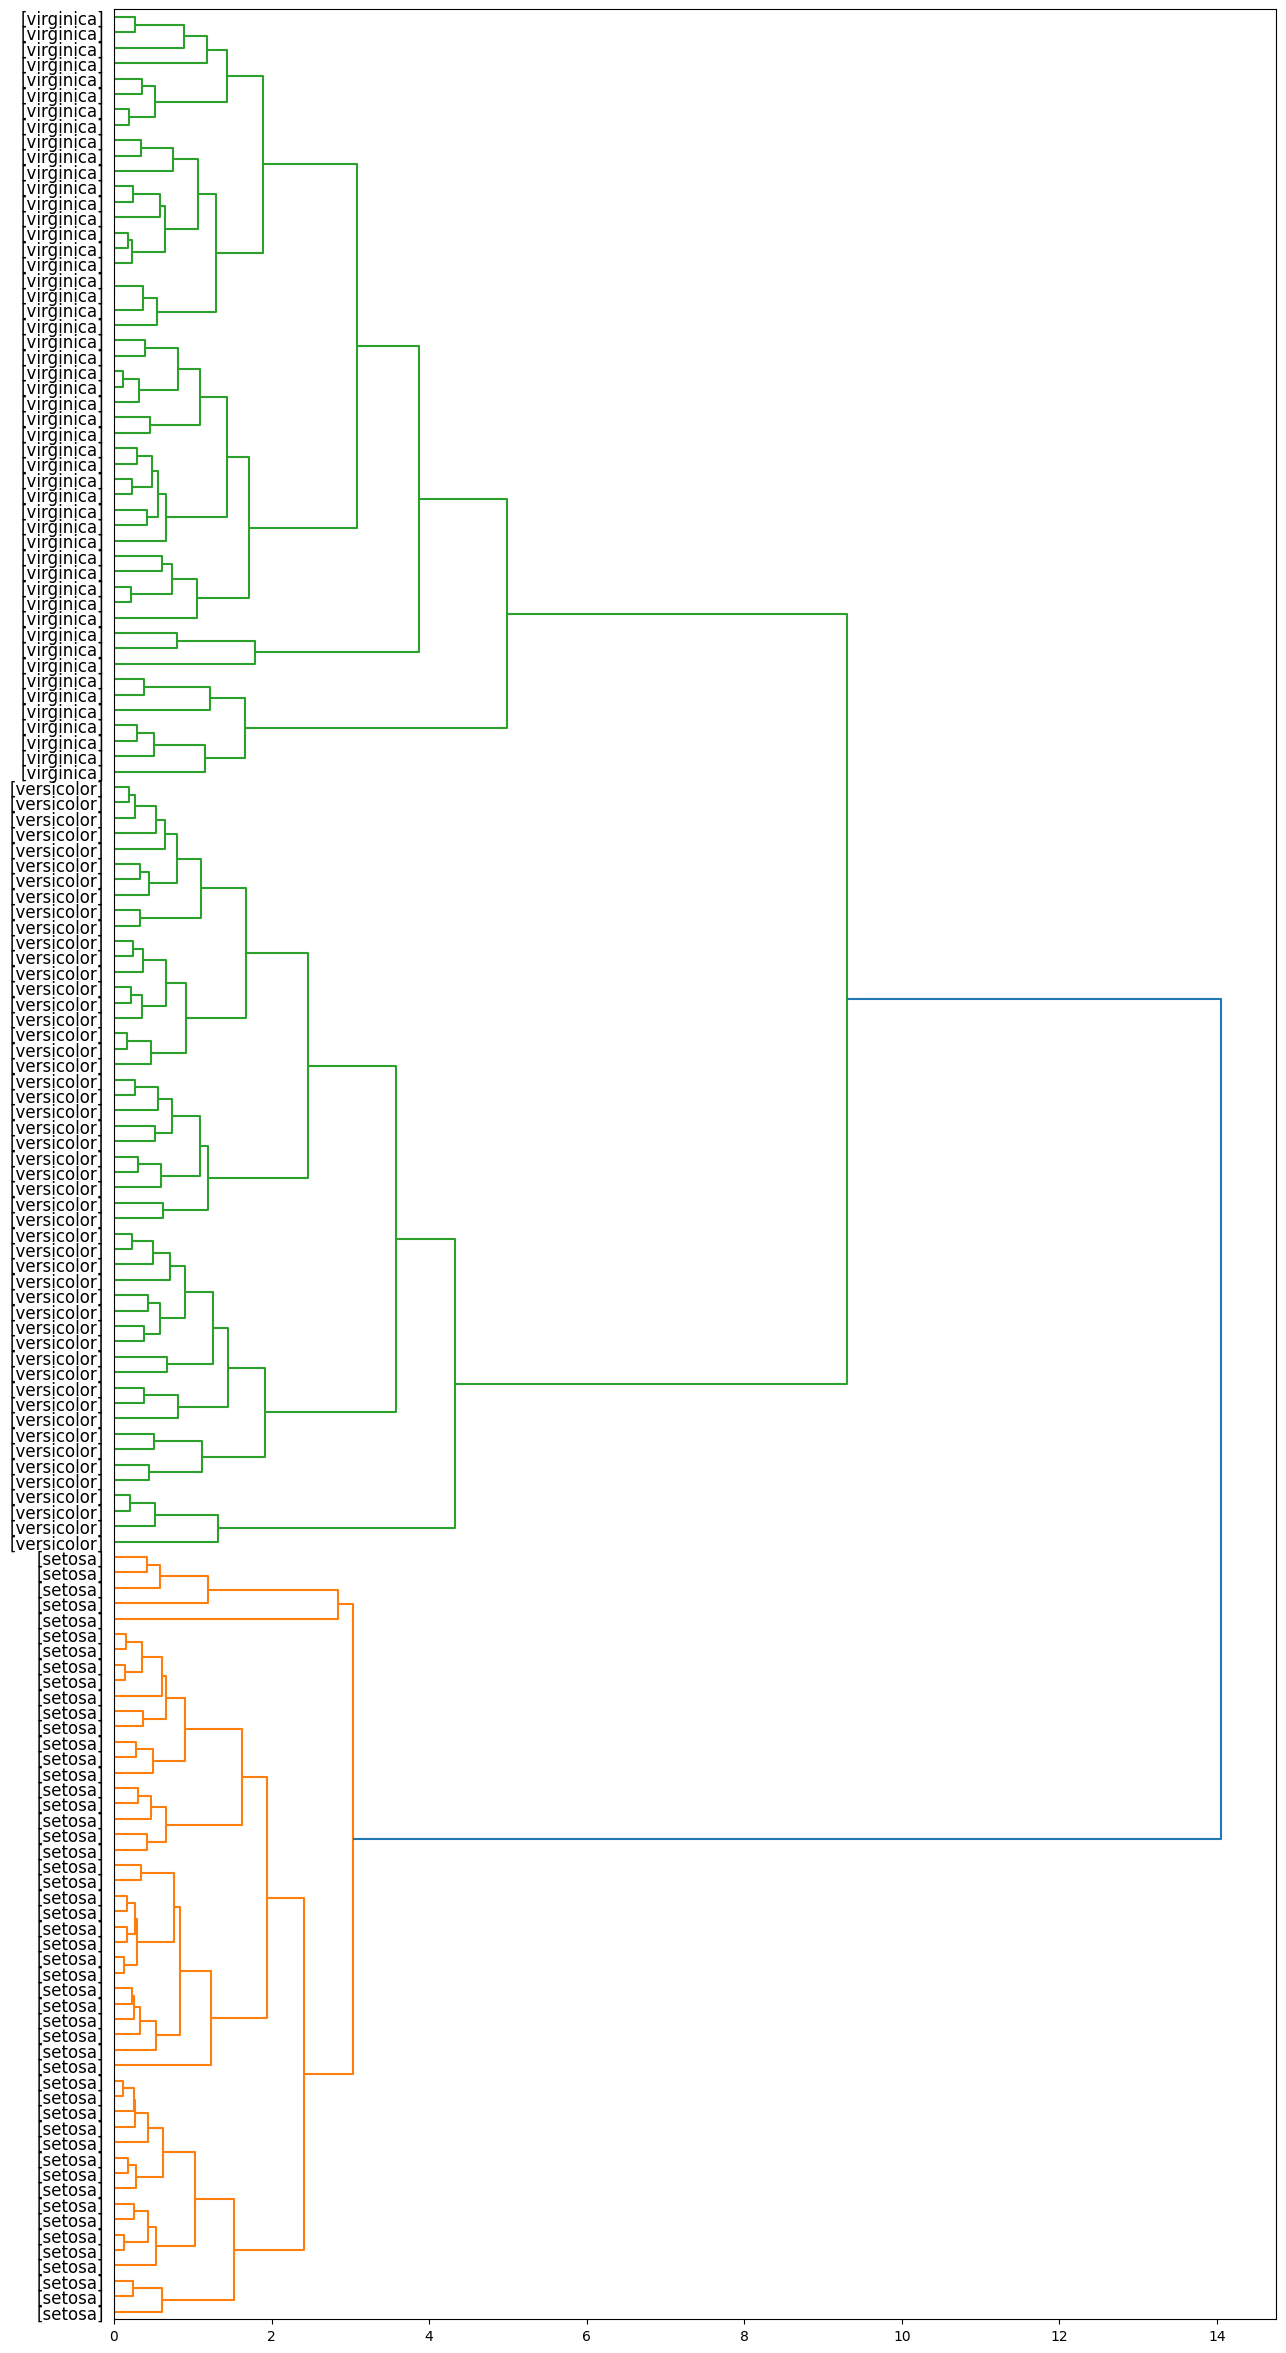

In [274]:
# Complete Linkage
iris_complete = hierarchy.linkage(D, 'complete')

# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(15,30))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s]' % (iris.target_names[pdf_iris['target'][id]])

# Membuat dendrogram
dendro = hierarchy.dendrogram(iris_complete, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

Penjelasan hasil:

Metode ini menghubungkan dua klaster berdasarkan jarak terbesar antara dua objek dari klaster yang berbeda.
Hasil dendrogram menunjukkan bahwa metode ini menghasilkan klaster yang paling seimbang dan paling akurat dengan label kelas yang sebenarnya.
Klaster yang terbentuk sesuai dengan tiga label kelas yang ada, dan hanya ada sedikit objek yang salah dikelompokkan.
Metode ini juga mampu memisahkan objek-objek yang memiliki jarak yang sangat dekat, seperti objek dengan label kelas versicolor dan virginica yang berada di sebelah kanan dendrogram.

**B. Agglomerative Clustering with Scikit-Learn**

Single Linkage

In [275]:
# Membuat objek dari kelas AgglomerativeClustering
iris_single = AgglomerativeClustering(n_clusters = 3, linkage = 'single').fit(feature_mtx)

# Melakukan clustering
iris_single.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Hasil:
Hasilnya adalah array yang berisi label dari setiap sampel setelah proses clustering. Angka-angka dalam array tersebut menunjukkan keanggotaan sampel ke dalam cluster tertentu. Dalam kasus ini, terdapat tiga cluster, dan sampel-sampel diberi label 0, 1, atau 2 berdasarkan clustering yang dilakukan menggunakan metode 'single' linkage pada algoritma Agglomerative Clustering.

In [276]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
single_iris_pdf = pdf_iris.copy(deep=True)

# Menambahkan kolom baru ke DataFrame single_iris_pdf dengan nama 'cluster_'. Nilai-nilai kolom ini diambil dari atribut labels_ dari model Agglomerative Clustering (iris_single), yang berisi label klaster untuk setiap sampel.
single_iris_pdf['cluster_'] = iris_single.labels_

# Menampilkan lima baris pertama
single_iris_pdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


Kode diatas menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame `single_iris_pdf`. Nilai-nilai kolom ini diambil dari atribut `labels_` dari model Agglomerative Clustering (`iris_single`), yang berisi label klaster untuk setiap sampel. Hasilnya, DataFrame `single_iris_pdf` ditampilkan dengan lima baris pertama, termasuk kolom baru 'cluster_' yang berisi label klaster.

In [277]:
# Menghitung tipe di setiap cluster
single_iris_pdf.groupby(['cluster_', 'target'])['cluster_'].count()

cluster_  target
0         2         50
1         0         50
2         1         50
Name: cluster_, dtype: int64

In [278]:
# Karakteristik masing-masing cluster
agg_iris_single_pdf = single_iris_pdf.groupby(['cluster_', 'target'])['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].mean()
agg_iris_single_pdf

<ipython-input-278-645192f6f445>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_iris_single_pdf = single_iris_pdf.groupby(['cluster_', 'target'])['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].mean()


,,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster_,target,,,,
0,2,6.588,2.974,5.552,2.026
1,0,5.006,3.428,1.462,0.246
2,1,5.936,2.770,4.260,1.326


Average Linkage

In [279]:
# Membuat objek dari kelas AgglomerativeClustering
iris_avg = AgglomerativeClustering(n_clusters = 3, linkage = 'average').fit(feature_mtx)

# Melakukan clustering
iris_avg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [280]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
avg_iris_pdf = pdf_iris.copy(deep=True)

# Menambahkan kolom baru ke DataFrame avg_iris_pdf dengan nama 'cluster_'. Nilai-nilai kolom ini diambil dari atribut labels_ dari model Agglomerative Clustering (iris_avg), yang berisi label klaster untuk setiap sampel.
avg_iris_pdf['cluster_'] = iris_avg.labels_

# Menampilkan lima baris pertama
avg_iris_pdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [281]:
# Menghitung tipe di setiap cluster
avg_iris_pdf.groupby(['cluster_', 'target'])['cluster_'].count()

cluster_  target
0         2         50
1         0         50
2         1         50
Name: cluster_, dtype: int64

In [282]:
# Karakteristik masing-masing cluster
agg_iris_avg_pdf = avg_iris_pdf.groupby(['cluster_', 'target'])['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].mean()
agg_iris_avg_pdf

<ipython-input-282-9e3959575b05>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_iris_avg_pdf = avg_iris_pdf.groupby(['cluster_', 'target'])['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].mean()


,,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster_,target,,,,
0,2,6.588,2.974,5.552,2.026
1,0,5.006,3.428,1.462,0.246
2,1,5.936,2.770,4.260,1.326


Complete Linkage

In [283]:
# Membuat objek dari kelas AgglomerativeClustering
iris_complete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete').fit(feature_mtx)

# Melakukan clustering
iris_complete.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [284]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
complete_iris_pdf = pdf_iris.copy(deep=True)

# Menambahkan kolom baru ke DataFrame complete_iris_pdf dengan nama 'cluster_'. Nilai-nilai kolom ini diambil dari atribut labels_ dari model Agglomerative Clustering (iris_complete), yang berisi label klaster untuk setiap sampel.
complete_iris_pdf['cluster_'] = iris_complete.labels_

# Menampilkan lima baris pertama
complete_iris_pdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [285]:
# Menghitung tipe di setiap cluster
complete_iris_pdf.groupby(['cluster_', 'target'])['cluster_'].count()

cluster_  target
0         0         50
1         1         50
          2         20
2         2         30
Name: cluster_, dtype: int64

In [286]:
# Karakteristik masing-masing cluster
agg_iris_complete_pdf = complete_iris_pdf.groupby(['cluster_', 'target'])['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].mean()
agg_iris_complete_pdf

<ipython-input-286-be4d4301e01e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_iris_complete_pdf = complete_iris_pdf.groupby(['cluster_', 'target'])['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].mean()


sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster_ target                                                           
0        0                5.006000             3.428           1.462000   
1        1                5.936000             2.770           4.260000   
         2                6.055000             2.740           5.130000   
2        2                6.943333             3.130           5.833333   

                 petal width (cm)  
cluster_ target                    
0        0               0.246000  
1        1               1.326000  
         2               1.815000  
2        2               2.166667

Plotting Scatter Plot

Text(0.5, 1.0, 'Complete Linkage')

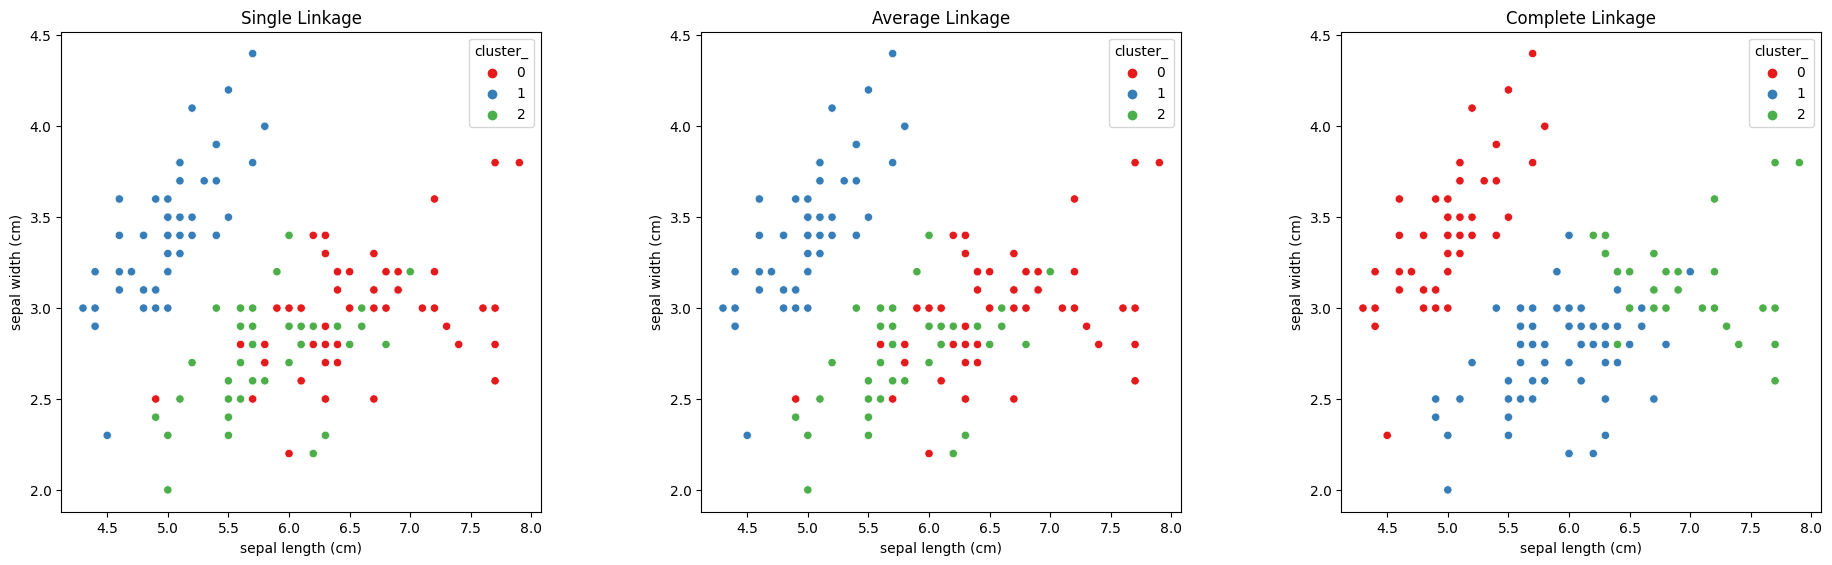

In [287]:
import seaborn as sns

# Plot cluster
fig = plt.figure(figsize=(16, 8))

# Tampilkan Single, Average, and Complete Linkage
# Single Linkage
# Give title and show the dendogram
ax1=fig.add_axes([0.1,0.1,0.3,0.6])
# Menampilkan scatter plot untuk hasil clustering dengan metode Single Linkage pada subplot pertama (ax1). Variabel yang divisualisasikan adalah 'sepal length (cm)' (sumbu x) dan 'sepal width (cm)' (sumbu y). Warna titik ditentukan berdasarkan kolom 'cluster_'.
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster_', data=single_iris_pdf, palette='Set1' )
# Menetapkan judul untuk subplot
ax1.set_title('Single Linkage')

# Average Linkage
# Give title and show the dendogram
ax2=fig.add_axes([0.5,0.1,0.3,0.6])
# Menampilkan scatter plot untuk hasil clustering dengan metode Average Linkage pada subplot kedua (ax2). Seperti sebelumnya, variabel yang divisualisasikan adalah 'sepal length (cm)' dan 'sepal width (cm)', dan warna titik ditentukan berdasarkan kolom 'cluster_'.
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster_', data=avg_iris_pdf, palette='Set1' )
# Menetapkan judul untuk subplot
ax2.set_title('Average Linkage')

# Complete Linkage
# Give title and show the dendogram
ax3=fig.add_axes([0.9,0.1,0.3,0.6])
# Menampilkan scatter plot untuk hasil clustering dengan metode Complete Linkage pada subplot ketiga (ax3). Variabel yang divisualisasikan adalah 'sepal length (cm)' dan 'sepal width (cm)', dan warna titik ditentukan berdasarkan kolom 'cluster_'.
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster_', data=complete_iris_pdf, palette='Set1' )
# Menetapkan judul untuk subplot
ax3.set_title('Complete Linkage')

Plotting Dendogram

Text(0.5, 1.0, 'Complete Linkage')

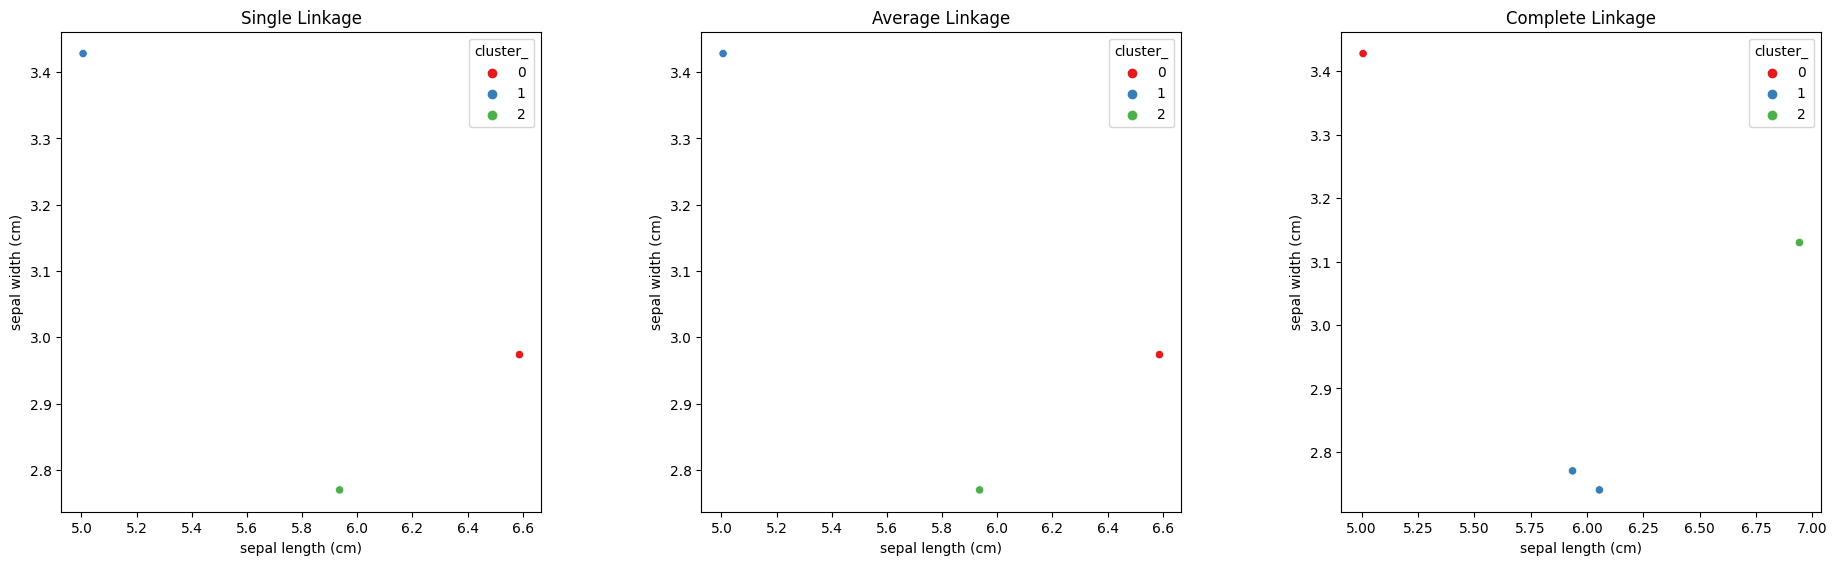

In [288]:
# Import Library seaborn
import seaborn as sns

# Plot cluster
fig = plt.figure(figsize=(16, 8))

# Tampilkan Single, Average, and Complete Linkage
# Single Linkage
# Give title and show the dendogram
ax1=fig.add_axes([0.1,0.1,0.3,0.6])
# Menampilkan scatter plot untuk hasil clustering dengan metode Single Linkage pada subplot pertama (ax1). Variabel yang divisualisasikan adalah 'sepal length (cm)' (sumbu x) dan 'sepal width (cm)' (sumbu y). Warna titik ditentukan berdasarkan kolom 'cluster_'.
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster_', data=agg_iris_single_pdf, palette='Set1' )
# Menetapkan judul untuk subplot
ax1.set_title('Single Linkage')

# Average Linkage
# Give title and show the dendogram
ax2=fig.add_axes([0.5,0.1,0.3,0.6])
# Menampilkan scatter plot untuk hasil clustering dengan metode Average Linkage pada subplot kedua (ax2). Seperti sebelumnya, variabel yang divisualisasikan adalah 'sepal length (cm)' dan 'sepal width (cm)', dan warna titik ditentukan berdasarkan kolom 'cluster_'.
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster_', data=agg_iris_avg_pdf, palette='Set1' )
# Menetapkan judul untuk subplot
ax2.set_title('Average Linkage')

# Complete Linkage
# Give title and show the dendogram
ax3=fig.add_axes([0.9,0.1,0.3,0.6])
# Menampilkan scatter plot untuk hasil clustering dengan metode Complete Linkage pada subplot ketiga (ax3). Variabel yang divisualisasikan adalah 'sepal length (cm)' dan 'sepal width (cm)', dan warna titik ditentukan berdasarkan kolom 'cluster_'.
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster_', data=agg_iris_complete_pdf, palette='Set1' )
# Menetapkan judul untuk subplot
ax3.set_title('Complete Linkage')

**Perbedaan antara metode Agglomerative Clustering menggunakan Single Linkage, Average Linkage, dan Complete Linkage**

Perbedaan antara metode Agglomerative Clustering menggunakan Single Linkage, Average Linkage, dan Complete Linkage dapat dilihat melalui karakteristik klaster yang terbentuk pada dataset iris. Single linkage, dengan menghitung jarak terkecil antara dua objek dari klaster yang berbeda, cenderung menghasilkan klaster yang panjang, tidak seimbang, dan sensitif terhadap adanya outlier. Sebaliknya, Average linkage, yang menghitung rata-rata jarak antara semua objek dari klaster yang berbeda, menghasilkan klaster yang lebih seimbang dan konsisten dengan label kelas yang sebenarnya. Complete linkage, dengan menghitung jarak terbesar antara dua objek dari klaster yang berbeda, menghasilkan klaster yang paling seimbang dan akurat dengan label kelas yang sebenarnya.

Dari visualisasi dendrogram, dapat diamati bahwa Single linkage dan Average linkage menghasilkan klaster yang tidak sesuai dengan label kelas sebenarnya. Klaster yang terbentuk memiliki jarak yang sangat kecil antara mereka, menunjukkan tingkat sensitivitas yang tinggi terhadap outlier. Sebaliknya, Complete linkage menghasilkan klaster yang lebih sesuai dengan label kelas sebenarnya, dengan jarak yang lebih besar antara klaster, menunjukkan kestabilan metode terhadap outlier.

Ketika melihat scatter plot, terlihat bahwa Single linkage menghasilkan klaster yang tidak memperhatikan dengan baik variabel sepal length dan sepal width yang seharusnya membedakan objek berdasarkan ukuran kelopak bunga. Average linkage dan Complete linkage, sebaliknya, menghasilkan klaster yang lebih konsisten dengan label kelas sebenarnya. Meskipun keduanya berhasil memperhatikan variabel tersebut, Complete linkage tampak lebih mampu memisahkan objek-objek yang memiliki jarak yang sangat dekat, menunjukkan keunggulan dalam menangani hubungan yang lebih kompleks antara elemen-elemen data.